In [1]:
# https://habr.com/en/post/468295/

# !pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.1.3
0.10.0


In [2]:
df = pd.read_excel('omnidb_exported (40).xlsx')

C:\Users\User\anaconda3\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


In [8]:
df

user_id  Индекс благополучия 1  Индекс благополучия 2  \
0       2382642                     -6                     -6   
1       5036365                     11                      2   
2       5036365                     13                      5   
3       5253574                     24                     11   
4       7196994                      4                      1   
...         ...                    ...                    ...   
7793  586610513                      4                      0   
7794  586621303                     -1                    -10   
7795  586646346                     -8                     -8   
7796  587697107                     16                     13   
7797  588036838                    -12                    -17   

      Индекс благополучия 3  Индекс благополучия 4  Индекс благополучия 5  \
0                        -7                    -14                    -16   
1                        17                     -2                    -16   
2                        19                     -7                    -15   
3                        28                      7                    -13   
4                         7                      1                    -18   
...                     ...                    ...                    ...   
7793                      4                      0                    -20   
7794                    -10                    -14                    -14   
7795                     -3                    -15                    -12   
7796                      8                      8                    -15   
7797                    -17                    -18                    -17   

      возраст  пол  группа возраста  \
0          14    0                1   
1          17    0                1   
2          15    0                1   
3          14    0                1   
4          16    1                1   
...       ...  ...              ...   
7793       17    0                1   
7794       19    0                2   
7795       18    1                2   
7796       18    1                2   
7797       15    1                1   

                                                publics  ...  \
0     61666189,1985910,10889156,65942534,65858909,12...  ...   
1     34277986,23413763,39410028,33682639,34346390,1...  ...   
2     34277986,23413763,39410028,33682639,34346390,1...  ...   
3     23769931,16361094,67053840,26562623,131941556,...  ...   
4     34277986,32884101,183355951,42372110,90060110,...  ...   
...                                                 ...  ...   
7793  184723843,35551136,46576367,126892825,33494375...  ...   
7794  55827701,35294456,136547353,143877185,38818986...  ...   
7795  56809741,123693971,184834425,120197824,1024092...  ...   
7796  148176249,34277986,109391351,44710041,11799563...  ...   
7797                                           32375815  ...   

      Просоциальное поведение (патриоти  Опасные манипуляции с телом (самоп  \
0                                     0                                   0   
1                                     0                                   0   
2                                     0                                   0   
3                                     0                                   0   
4                                     0                                   0   
...                                 ...                                 ...   
7793                                  0                                   0   
7794                                  0                                   0   
7795                                  0                                   0   
7796                                  0                                   0   
7797                                  0                                   0   

      Продукты деятельности (собственно  «Жесть» (расчлененка, кровь и т.п.)  \
0                                  

In [9]:
df = df.loc[:, (df != 0).any(axis=0)]

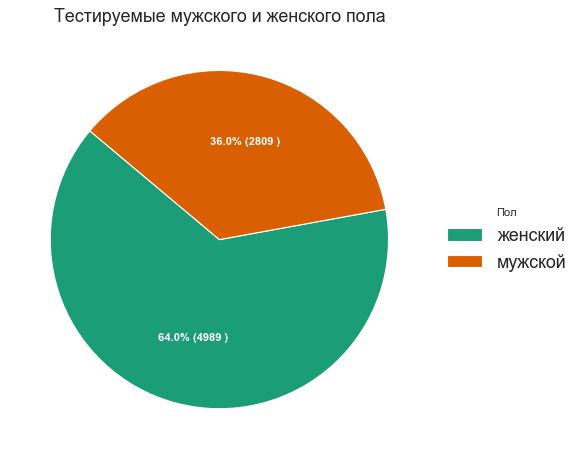

In [19]:
#Круговая диаграмма
# Prepare Data
df_new = df.groupby('пол').size().reset_index(name='counts')

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = df_new['counts']
categories = ['женский','мужской']
#explode = [0,0,0,0,0,0.1,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140)

# Decoration
ax.legend(wedges, categories, title="Пол", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Тестируемые мужского и женского пола")
plt.show()

In [5]:
#в данных города уже закодированы функцией OneHotEncoding, поэтому раскодируем их обратно для визуализации
df['город'] = 'А'
df['город'].loc[(df['город_1.0'] == 1)]="Москва и Нижний Новгород"
df['город'].loc[(df['город_2.0'] == 1)]="Воронеж"
df['город'].loc[(df['город_3.0'] == 1)]="Севастополь"
df['город'].loc[(df['город_4.0'] == 1)]="Томск"
df['город'].loc[(df['город_5.0'] == 1)]="Тюмень"

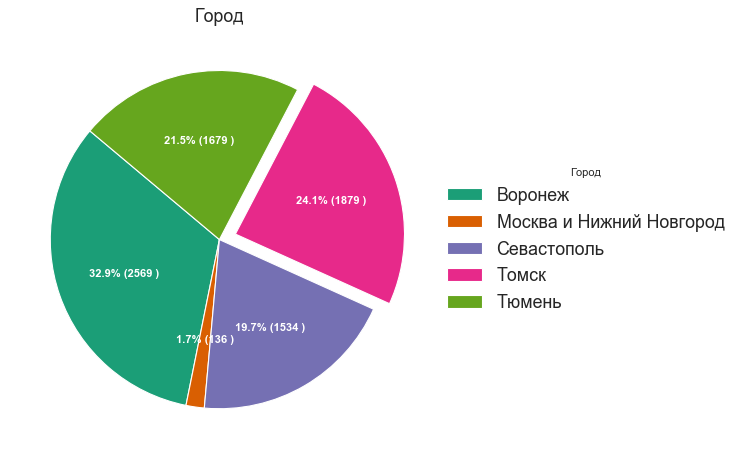

In [6]:
#Круговая диаграмма
# Prepare Data
df_new = df.groupby('город').size().reset_index(name='counts')

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = df_new['counts']
categories = df_new['город']
explode = [0,0,0,0.1,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Город", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Город")
plt.show()

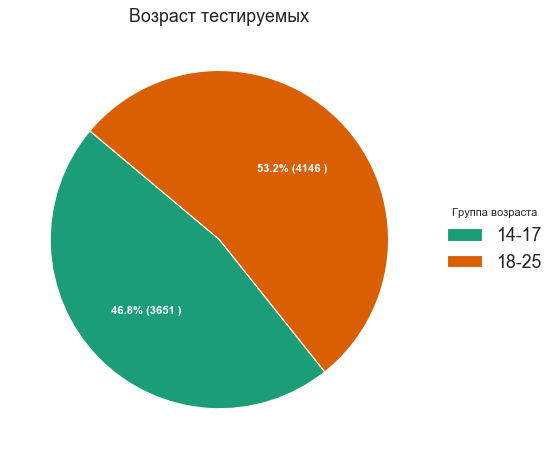

In [10]:
#Круговая диаграмма
# Prepare Data
df_new = df.groupby('группа возраста').size().reset_index(name='counts')

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = df_new['counts']
categories = ['14-17','18-25']
#explode = [0,0,0,0.1,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140)

# Decoration
ax.legend(wedges, categories, title="Группа возраста", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Возраст тестируемых")
plt.show()

<BarContainer object of 13 artists>

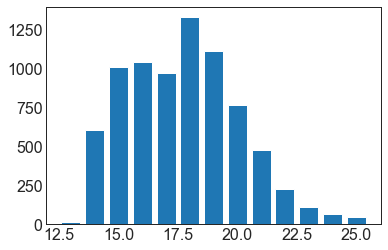

In [9]:
plt.bar(df_new['возраст'], df_new['counts']б )

In [23]:
data=df
data.loc[data['Индекс благополучия 1']<=5, 'Индекс благополучия 1'] = 0
data.loc[data['Индекс благополучия 1']>5, 'Индекс благополучия 1'] = 1

data.loc[data['Индекс благополучия 2']>=-1, 'Индекс благополучия 2'] = 1
data.loc[data['Индекс благополучия 2']<-1, 'Индекс благополучия 2'] = 0

data.loc[data['Индекс благополучия 3']<=2, 'Индекс благополучия 3'] = 0
data.loc[data['Индекс благополучия 3']>2, 'Индекс благополучия 3'] = 1

data.loc[data['Индекс благополучия 4']>=-7, 'Индекс благополучия 4'] = 1
data.loc[data['Индекс благополучия 4']<-7, 'Индекс благополучия 4'] = 0

data.loc[data['Индекс благополучия 5']>=-15, 'Индекс благополучия 5'] = 1
data.loc[data['Индекс благополучия 5']<-15, 'Индекс благополучия 5'] = 0

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [57]:
data=data.drop('город',axis=1)
table_in_format = pd.melt(data, id_vars=data.columns[:15])

In [58]:
table_in_format

user_id  Индекс благополучия 1  Индекс благополучия 2  \
0         2382642                      0                      0   
1         5036365                      1                      1   
2         5036365                      1                      1   
3         5253574                      1                      1   
4         7196994                      0                      1   
...           ...                    ...                    ...   
116965  586610513                      0                      1   
116966  586621303                      0                      0   
116967  586646346                      0                      0   
116968  587697107                      1                      1   
116969  588036838                      0                      0   

        Индекс благополучия 3  Индекс благополучия 4  Индекс благополучия 5  \
0                           0                      0                      0   
1                           1                      1                      0   
2                           1                      1                      1   
3                           1                      1                      1   
4                           1                      1                      0   
...                       ...                    ...                    ...   
116965                      1                      1                      0   
116966                      0                      0                      1   
116967                      0                      0                      1   
116968                      1                      1                      1   
116969                      0                      0                      0   

        возраст  пол  группа возраста  \
0            14    0                1   
1            17    0                1   
2            15    0                1   
3            14    0                1   
4            16    1                1   
...         ...  ...              ...   
116965       17    0                1   
116966       19    0                2   
116967       18    1                2   
116968       18    1                2   
116969       15    1                1   

                                                  publics  город_1.0  \
0       61666189,1985910,10889156,65942534,65858909,12...          0   
1       34277986,23413763,39410028,33682639,34346390,1...          0   
2       34277986,23413763,39410028,33682639,34346390,1...          0   
3       23769931,16361094,67053840,26562623,131941556,...          0   
4       34277986,32884101,183355951,42372110,90060110,...          0   
...                                                   ...        ...   
116965  184723843,35551136,46576367,126892825,33494375...          0   
116966  55827701,35294456,136547353,143877185,38818986...          0   
116967  56809741,123693971,184834425,120197824,1024092...          0   
116968  148176249,34277986,109391351,44710041,11799563...          0   
116969                                           32375815          0   

        город_2.0  город_3.0  город_4.0  город_5.0  \
0               1          0          0          0   
1               0          0          0          1   
2               0          0          0          1   
3               1          0          0          0   
4               0          0          0          1   
...           ...        ...        ...        ...   
116965          0          0          0          1   
116966          0          0          1          0   
116967          0          0          1          0   
116968          0          0          0          1   
116969          0          0          0          1   

                                  variable  value  
0       Монетизация контента (заработок в       0  
1       Монетизация контента (заработок в       0  
2       Монетизация контента (заработок в       0  
3       Монетизация контента (заработок в

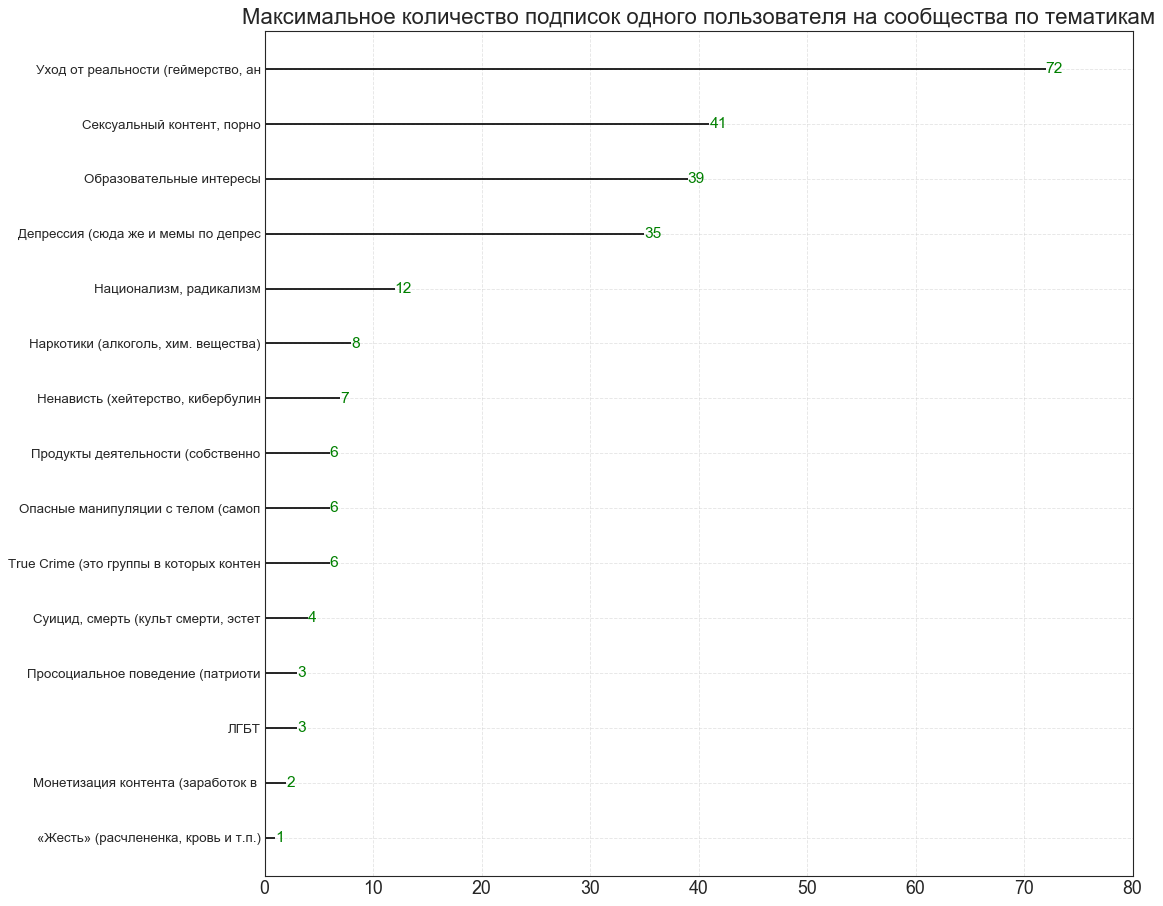

In [84]:
# Расходящиеся стобцы с текстом

# — похожи на расходящиеся столбцы, и это предпочтительнее, если вы хотите показать значимость каждого элемента 
# в диаграмме в хорошем и презентабельном виде.

# Prepare Data
# x = table_in_format.loc[:, ['value']]
group = table_in_format.groupby(by=['variable']).max()
group['colors'] = ['red' if x < 0 else 'green' for x in group['value']]
group.sort_values('value', inplace=True)
# group.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=group.index, xmin=0, xmax=group.value)
for x, y, tex in zip(group.value, group.index, group.value):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':14})

# Decorations    
plt.yticks(group.index, group.index, fontsize=12)
plt.title('Максимальное количество подписок одного пользователя на сообщества по тематикам', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(0, 80)
plt.show()

In [98]:
df = pd.read_excel('omnidb_exported (40).xlsx')

C:\Users\User\anaconda3\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


In [99]:
df = df.loc[:, (df != 0).any(axis=0)]

In [113]:
df.iloc[:,15:29]

Монетизация контента (заработок в   Сексуальный контент, порно  \
0                                      0                           0   
1                                      0                           0   
2                                      0                           0   
3                                      0                           0   
4                                      0                           0   
...                                  ...                         ...   
7793                                   0                           2   
7794                                   0                           0   
7795                                   0                           4   
7796                                   0                           0   
7797                                   0                           0   

      Ненависть (хейтерство, кибербулин  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   
...                                 ...   
7793                                  0   
7794                                  0   
7795                                  0   
7796                                  0   
7797                                  0   

      True Crime (это группы в которых контен  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
...                                       ...   
7793                                        0   
7794                                        0   
7795                                        0   
7796                                        0   
7797                                        0   

      Уход от реальности (геймерство, ан  Депрессия (сюда же и мемы по депрес  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4                                      0                                    0   
...                                  ...                                  ...   
7793                                   0                                    0   
7794                                   0                                    0   
7795                                   9                                    0   
7796                                   0                                    0   
7797                                   0                                    0   

      Просоциальное поведение (патриоти  Опасные манипуляции с телом (самоп  \
0                                     0                                   0   
1                                     0                                   0   
2                                     0                                   0   
3                                     0                                   0   
4                                     0                                   0   
...                                 ...                                 ...   
7793                                  0                                   0   
7794                                  0                                   0   
7795                                  0                                   0   
7796                                  0                                   0   
7797                                  0                                   0   

      Продукты деятельности (собственно  «Жесть» (расчлененка, кровь и т.п.)  \
0                                

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46788 entries, 0 to 46787
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   возраст                                  46788 non-null  int64 
 1   пол                                      46788 non-null  int64 
 2   группа возраста                          46788 non-null  int64 
 3   publics                                  46788 non-null  object
 4   город_1.0                                46788 non-null  int64 
 5   город_2.0                                46788 non-null  int64 
 6   город_3.0                                46788 non-null  int64 
 7   город_4.0                                46788 non-null  int64 
 8   город_5.0                                46788 non-null  int64 
 9   Монетизация контента (заработок в        46788 non-null  int64 
 10  Сексуальный контент, порно               46788 non-null  i

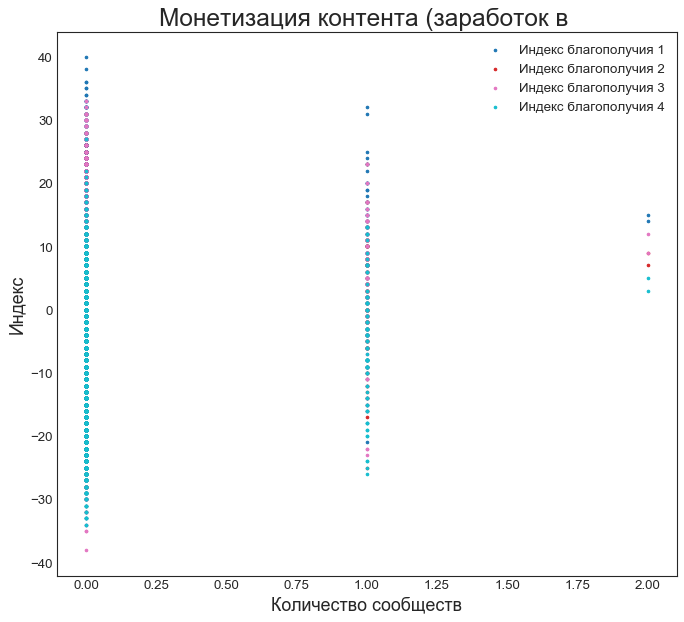

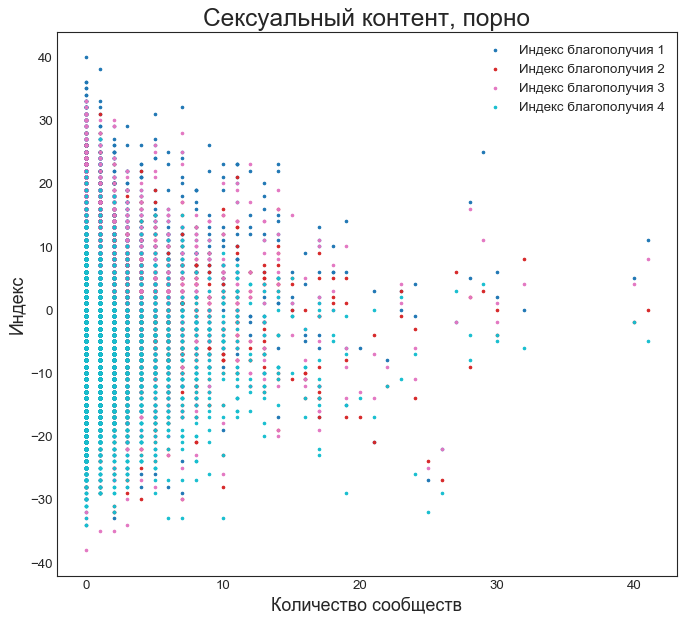

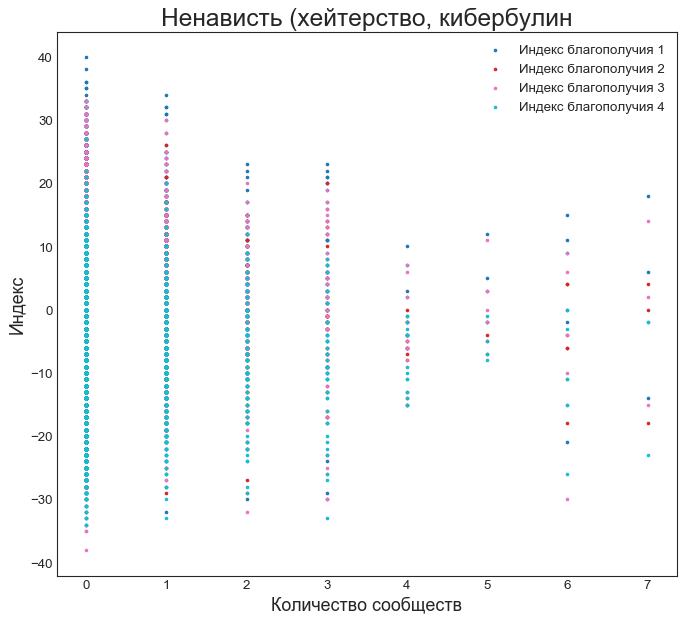

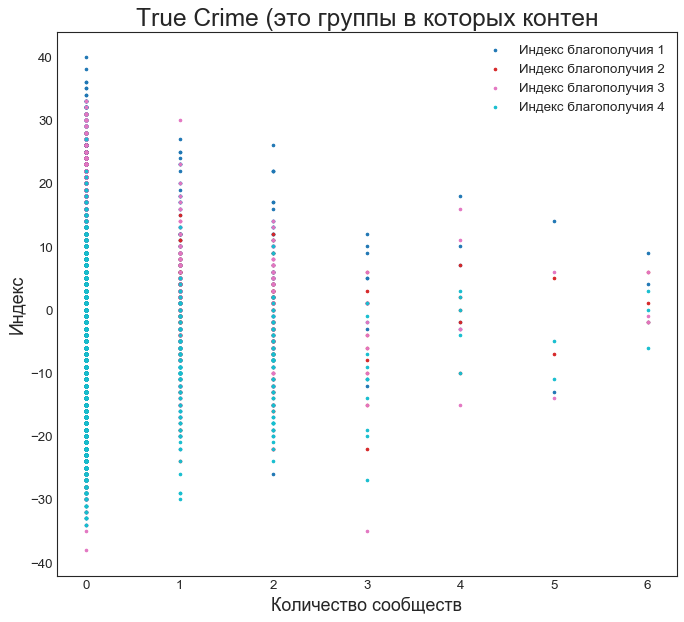

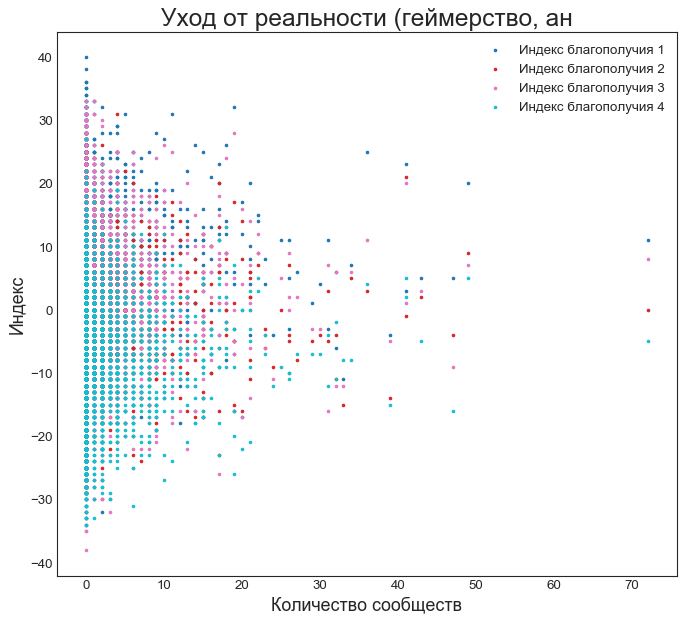

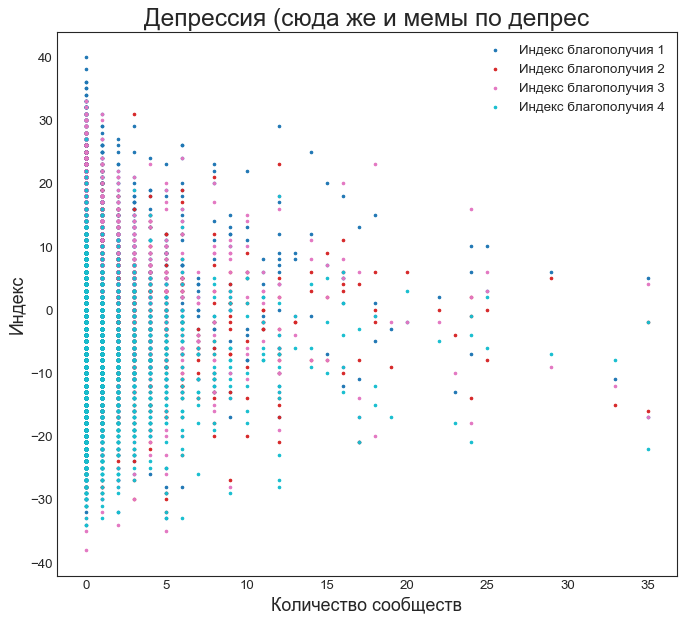

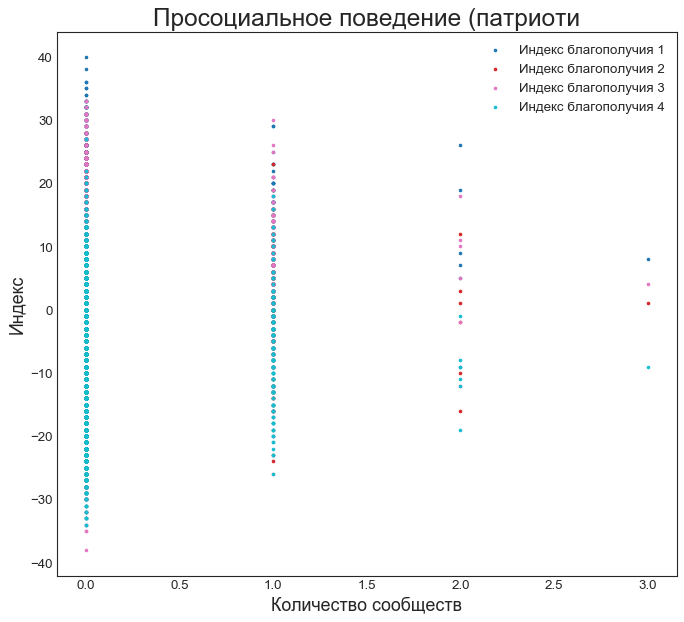

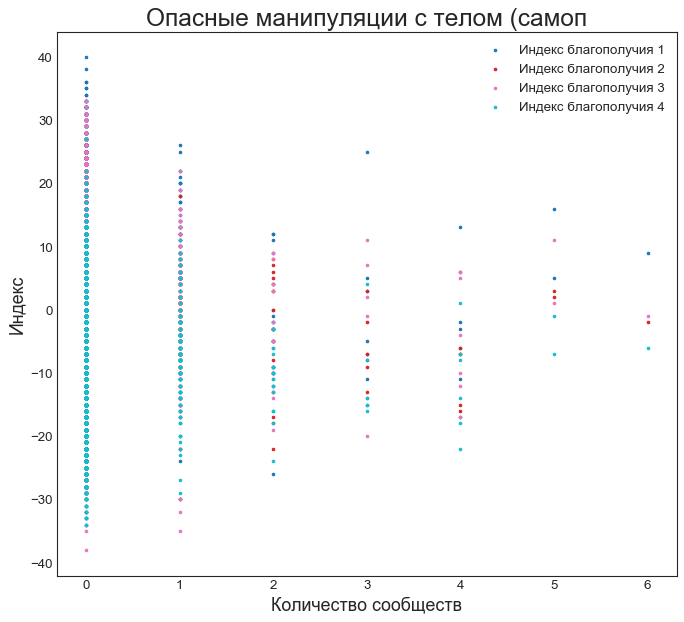

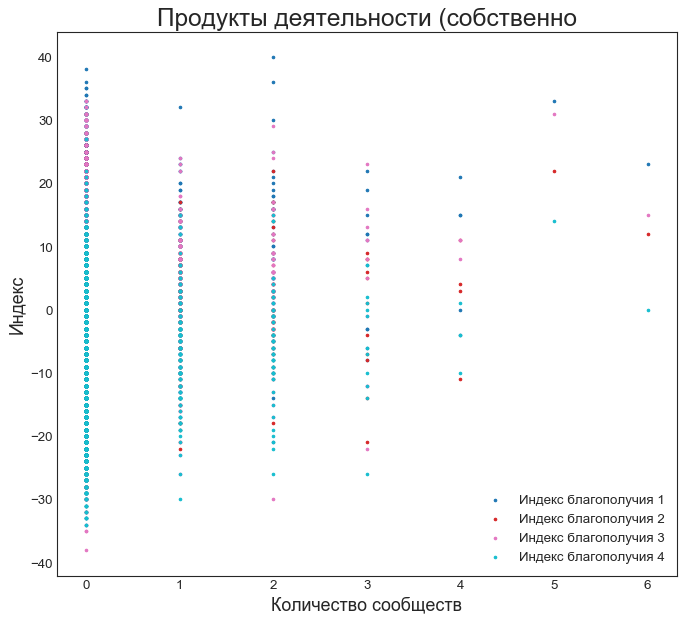

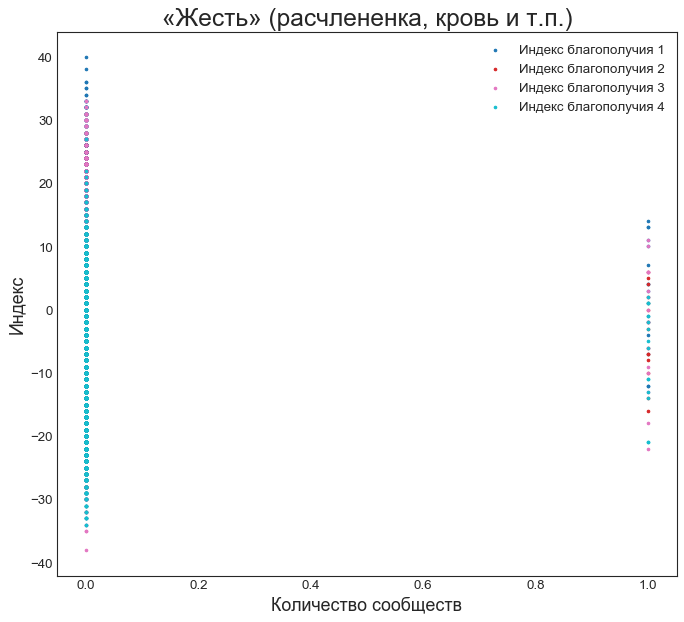

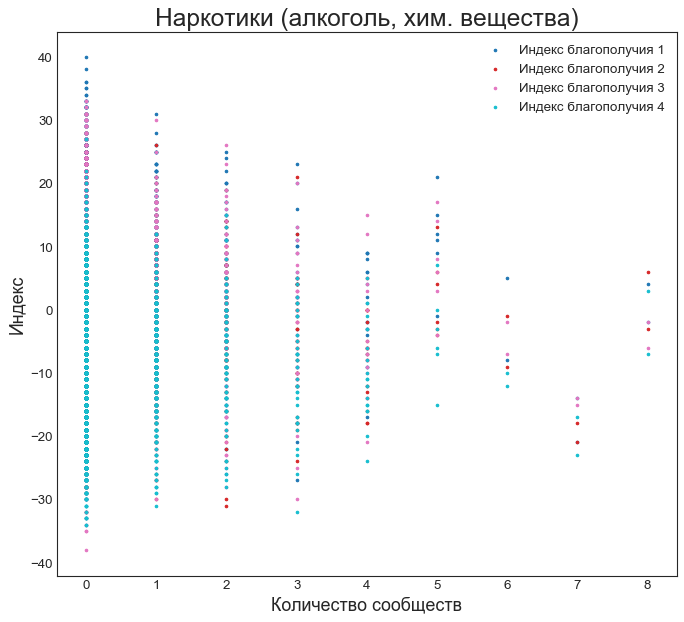

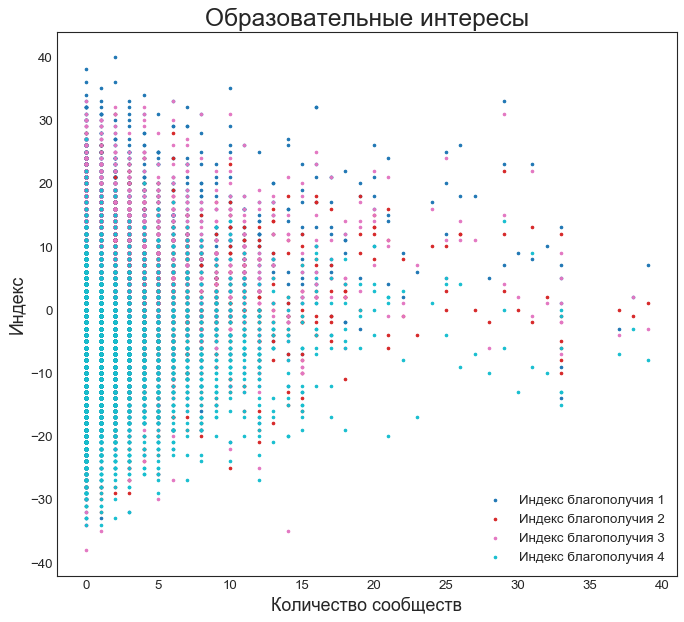

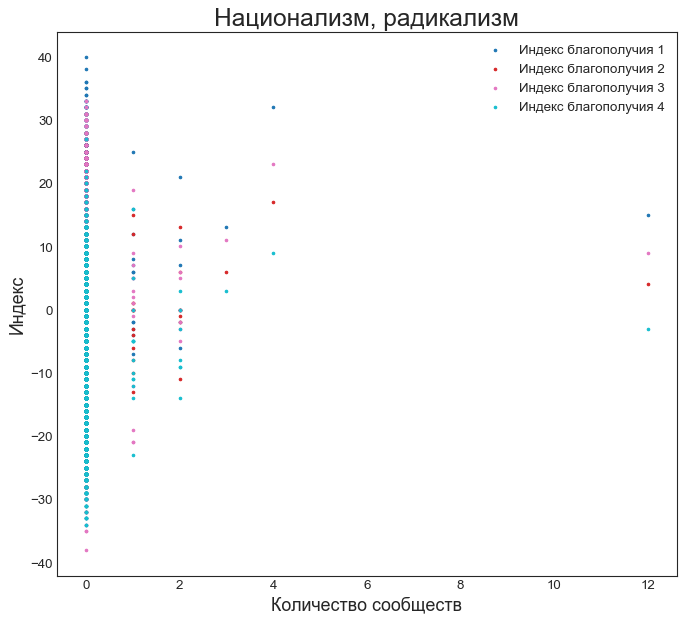

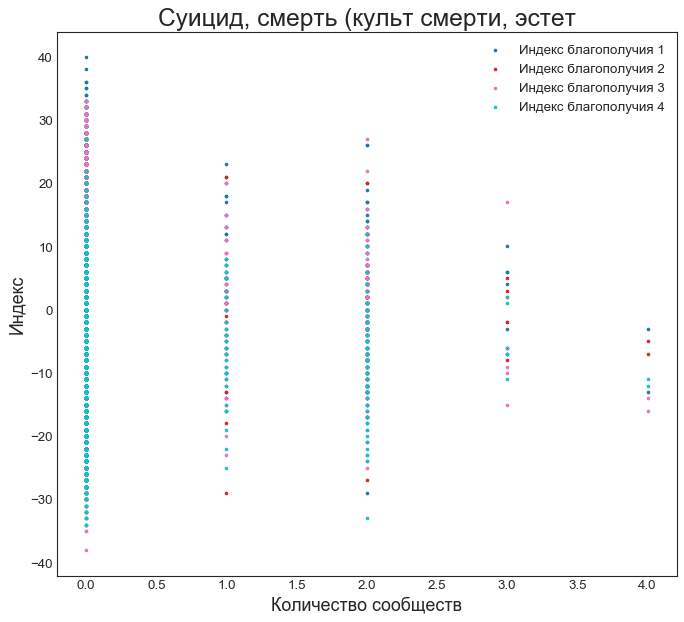

In [116]:
# Точечный график
# Scatteplot — это классический и фундаментальный вид диаграммы, используемый для изучения взаимосвязи между 
# двумя переменными. Если у вас есть несколько групп в ваших данных, вы можете визуализировать каждую группу 
# в другом цвете. В matplotlib вы можете легко сделать это, используя plt.scatterplot().

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

# Import dataset
df_new = pd.melt(df, id_vars=data.columns[6:])
df_new.info()

# Prepare Data 
# Create as many colors as there are unique midwest['category']

categories = ['Индекс благополучия 1','Индекс благополучия 2','Индекс благополучия 3', 'Индекс благополучия 4']
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category

for j in range(15,29):
    plt.figure(figsize=(10,9), dpi= 80, facecolor='w', edgecolor='k')
    for i, category in enumerate(categories):
        plt.scatter(df.columns[j], 'value', 
                    data=df_new.loc[df_new.variable==category, :], 
                    s=5, c=colors[i], label=str(category))

    # Decorations
    plt.gca().set(xlabel='Количество сообществ', ylabel='Индекс')

    plt.xticks(fontsize=12); plt.yticks(fontsize=12)
    plt.title(df.columns[j], fontsize=22)
    plt.legend(fontsize=12)    
    plt.show()  

In [119]:
cols = ['Индекс благополучия 1','пол', 'группа возраста',
       'город_1.0', 'город_2.0', 'город_3.0', 'город_4.0', 'город_5.0',
       'Монетизация контента (заработок в ', 'Сексуальный контент, порно',
       'Ненависть (хейтерство, кибербулин',
       'True Crime (это группы в которых контен',
       'Уход от реальности (геймерство, ан',
       'Депрессия (сюда же и мемы по депрес',
       'Просоциальное поведение (патриоти',
       'Опасные манипуляции с телом (самоп',
       'Продукты деятельности (собственно',
       '«Жесть» (расчлененка, кровь и т.п.)',
       'Наркотики (алкоголь, хим. вещества)', 'Образовательные интересы',
       'Национализм, радикализм', 'Суицид, смерть (культ смерти, эстет',
       'ЛГБТ']

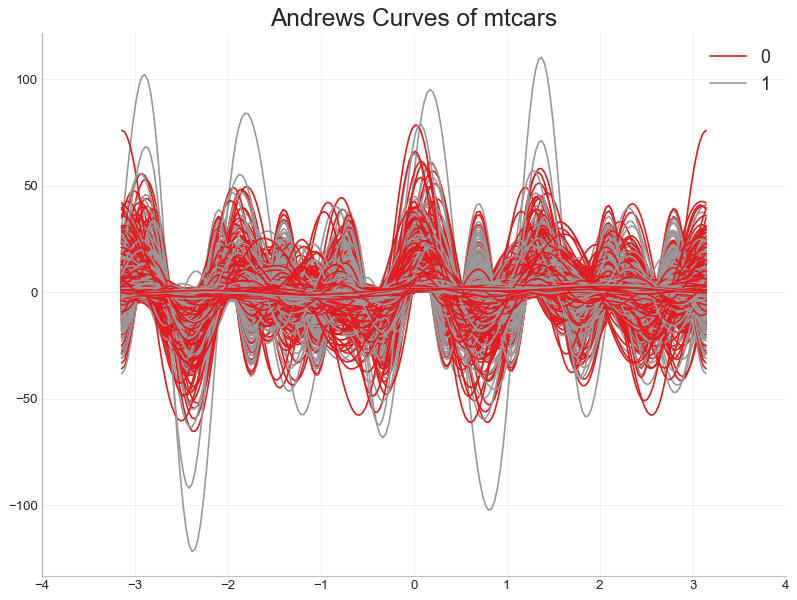

In [120]:
# 49. Кривая Эндрюса

# Кривая Эндрюса помогает визуализировать, существуют ли присущие группировке числовые особенности, 
# основанные на данной группировке. 
# Если объекты (столбцы в наборе данных) не помогают различить группу, то линии не будут хорошо разделены, как показано ниже

from pandas.plotting import andrews_curves

# Import

# df.drop(['cars', 'carname'], axis=1, inplace=True)

# Plot
plt.figure(figsize=(12,9), dpi= 80)
andrews_curves(data[cols], 'Индекс благополучия 1', colormap='Set1')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Andrews Curves of mtcars', fontsize=22)
plt.xlim(-4,4)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Индекс благополучия 1


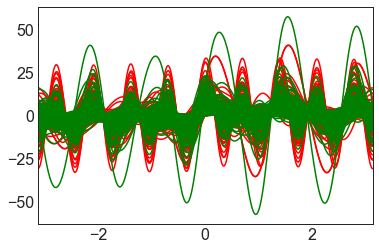

Индекс благополучия 2


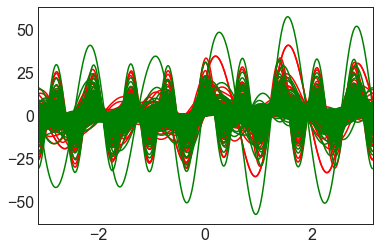

Индекс благополучия 3


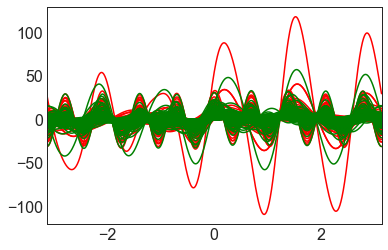

Индекс благополучия 4


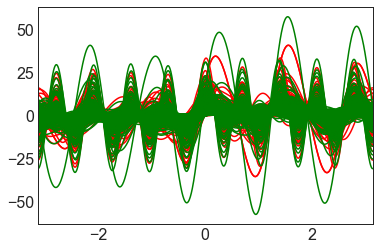

Индекс благополучия 5


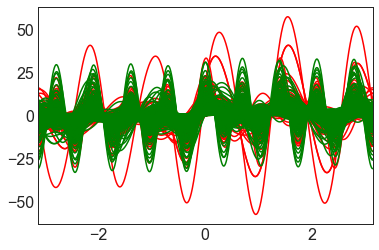

In [124]:
import numpy as np
import pylab as pl

def andrews_curve(x,theta):
    curve = list()
    for th in theta:
        x1 = x[0] / np.sqrt(2)
        x2 = x[1] * np.sin(th)
        x3 = x[2] * np.cos(th)
        x4 = x[3] * np.sin(2.*th)
        x5 = x[4] * np.cos(2.*th)
        x6 = x[5] * np.sin(3.*th)
        x7 = x[6] * np.cos(3.*th)
        x8 = x[7] * np.sin(4.*th)
        x9 = x[8] * np.cos(4.*th)
        x10 = x[9] * np.sin(5.*th)
        x11 = x[10] * np.cos(5.*th)
        x12 = x[11] * np.sin(5.*th)
        x13 = x[12] * np.cos(6.*th)
        x14 = x[13] * np.sin(6.*th)
        x15 = x[14] * np.cos(7.*th)
        x16 = x[15] * np.sin(7.*th)
        x17 = x[16] * np.cos(8.*th)
        x18 = x[17] * np.sin(8.*th)
        x19 = x[18] * np.cos(9.*th)
        x20 = x[19] * np.sin(9.*th)
        x21 = x[20] * np.cos(10.*th)
        x22 = x[21] * np.sin(10.*th)
        curve.append(x1+x2+x3+x4+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22)
    return curve

accuracy = 1000
theta = np.linspace(-np.pi, np.pi, accuracy)

#на 500 первых наблюдений
for idx in range(1,6):
    for s in data[cols[1:]].loc[data.iloc[:,idx]==1].to_numpy()[:500]: # повышенный
        pl.plot(theta, andrews_curve(s, theta), 'r')
    print('Индекс благополучия', idx)
    for s in data[cols[1:]].loc[data.iloc[:,idx]==0].to_numpy()[:500]: # пониженный
        pl.plot(theta, andrews_curve(s ,theta), 'g')


    pl.xlim(-np.pi,np.pi)
    pl.show()


Индекс благополучия 1


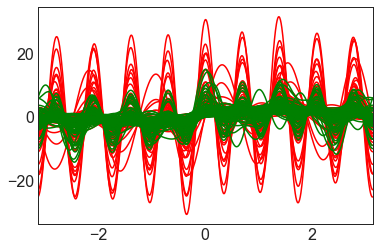

Индекс благополучия 2


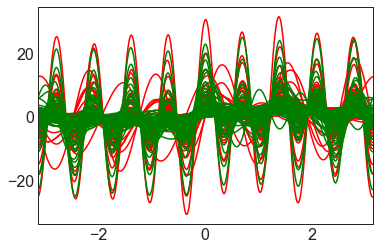

Индекс благополучия 3


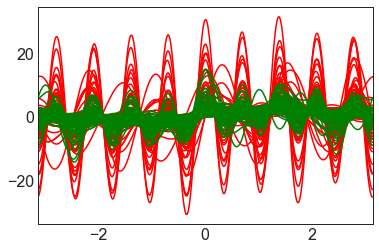

Индекс благополучия 4


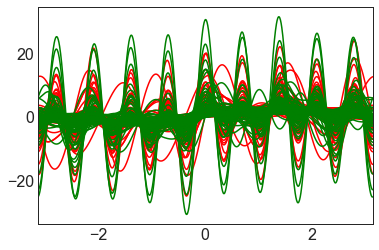

Индекс благополучия 5


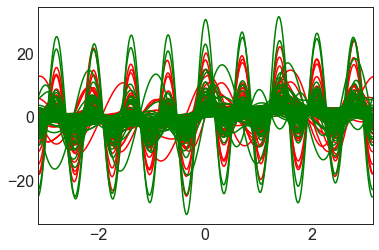

In [125]:
#на 100 первых наблюдениях
for idx in range(1,6):
    for s in data[cols[1:]].loc[data.iloc[:,idx]==1].to_numpy()[:100]: # повышенный
        pl.plot(theta, andrews_curve(s, theta), 'r')
    print('Индекс благополучия', idx)
    for s in data[cols[1:]].loc[data.iloc[:,idx]==0].to_numpy()[:100]: # пониженный
        pl.plot(theta, andrews_curve(s ,theta), 'g')


    pl.xlim(-np.pi,np.pi)
    pl.show()
